In [3]:
import matplotlib.pyplot as plt
import numpy as np
import json

/var/folders/84/kqtnvkcx08n_zjcl2r9rbfcc0000gn/T/ipykernel_73456/2383031735.py:58: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_set1 = cm.get_cmap('Reds', 10)
/var/folders/84/kqtnvkcx08n_zjcl2r9rbfcc0000gn/T/ipykernel_73456/2383031735.py:62: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_set2 = cm.get_cmap('Blues', 10)


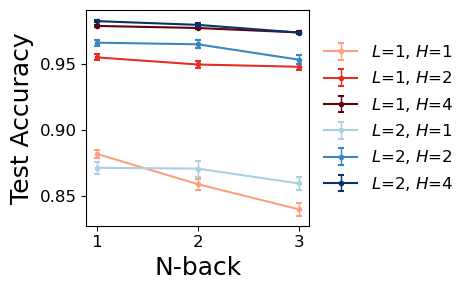

In [5]:
# File paths for the six experiments
file_paths = [
    'trained_models/1_layer_1_head_all_results.json',
    'trained_models/1_layer_2_head_all_results.json',
    'trained_models/1_layer_4_head_all_results.json',
    'trained_models/2_layer_1_head_all_results.json',
    'trained_models/2_layer_2_head_all_results.json',
    'trained_models/2_layer_4_head_all_results.json'
]

# Labels for the legend
experiment_labels = [
    '$L$=1, $H$=1',
    '$L$=1, $H$=2',
    '$L$=1, $H$=4',
    '$L$=2, $H$=1',
    '$L$=2, $H$=2',
    '$L$=2, $H$=4'
]

# Initialize lists to store average accuracies and standard errors for all experiments
all_avg_accuracies = []
all_se_accuracies = []

# Load data and calculate average accuracies and SEs
for file_path in file_paths:
    with open(file_path, 'r') as f:
        all_results = json.load(f)
        
    avg_accuracies = []
    se_accuracies = []
    
    # Loop through n=1, 2, 3 (the N-back tasks)
    for n in range(1, 4):
        accuracies = [all_results['{}back_model{}'.format(n, m)]['test_accuracy'] for m in range(50)]
        avg_accuracy = np.mean(accuracies)
        std_error = np.std(accuracies) / np.sqrt(len(accuracies))  # Standard error
        
        avg_accuracies.append(avg_accuracy)
        se_accuracies.append(std_error)
    
    all_avg_accuracies.append(avg_accuracies)
    all_se_accuracies.append(se_accuracies)

# Define the x-axis (N-back tasks)
x = range(1, 4)

# Plotting
plt.figure(figsize=(4.8,3))

# use two sets of colors for L=1 and L=2, each set has 3 colors with increasing darkness
import matplotlib.cm as cm
# get colors for L=1, use the most saturated color map
color_set1 = cm.get_cmap('Reds', 10)
# we need the color values to be in a list
color_set1 = [color_set1(i) for i in [3,6,9]]
# get three colors for L=2
color_set2 = cm.get_cmap('Blues', 10)
color_set2 = [color_set2(i) for i in [3,6,9]]
# combine the two sets
colors = [color_set1[0], color_set1[1], color_set1[2], color_set2[0], color_set2[1], color_set2[2]]
# Loop through each experiment and plot its results with error bars
for i, (avg_accuracies, se_accuracies) in enumerate(zip(all_avg_accuracies, all_se_accuracies)):
    plt.errorbar(x, avg_accuracies, yerr=se_accuracies, fmt='-o', label=experiment_labels[i], 
                 capsize=2, elinewidth=1, markeredgewidth=1.5, markersize=2.5, color=colors[i])

# Customize the plot
plt.xlabel('N-back', fontsize=18)
plt.ylabel('Test Accuracy', fontsize=18)
plt.xticks(x, ['1', '2', '3'])
# for y ticks, keep two decimal points
plt.gca().yaxis.set_major_formatter('{:.2f}'.format)
# put legend outside of plot on the left , remove box
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=12)
plt.tick_params(axis='both', which='both', labelsize=12)
# Show plot
plt.tight_layout()

# save as svg
plt.savefig('figures/accuracy_vs_nback.svg', format='svg')

plt.show()
